In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

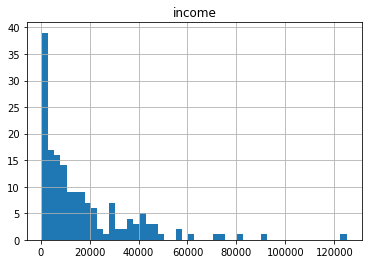

In [6]:
df[['income']].hist(bins=50)

<AxesSubplot:>

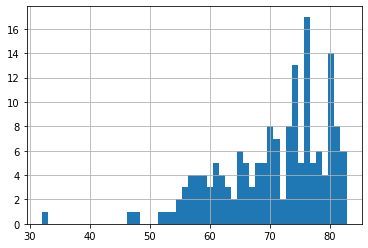

In [7]:
df['life_expec'].hist(bins=50)

In [8]:
len(df['country'].unique())

167

In [9]:
features=[]
for feature in df.columns[1:]:
    features.append(feature)
features

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [10]:
X=df[features]
X=np.asarray(X)
X[:5]

array([[9.02e+01, 1.00e+01, 7.58e+00, 4.49e+01, 1.61e+03, 9.44e+00,
        5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, 4.86e+01, 9.93e+03, 4.49e+00,
        7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, 3.14e+01, 1.29e+04, 1.61e+01,
        7.65e+01, 2.89e+00, 4.46e+03],
       [1.19e+02, 6.23e+01, 2.85e+00, 4.29e+01, 5.90e+03, 2.24e+01,
        6.01e+01, 6.16e+00, 3.53e+03],
       [1.03e+01, 4.55e+01, 6.03e+00, 5.89e+01, 1.91e+04, 1.44e+00,
        7.68e+01, 2.13e+00, 1.22e+04]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:5]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)

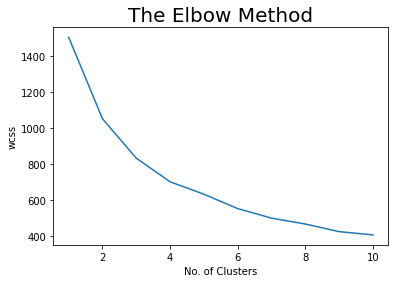

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [16]:
labels=km.labels_
labels[:5]

array([0, 1, 8, 0, 1])

In [17]:
##4 is optimal no. of clusters

In [18]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(X)

KMeans(n_clusters=4, random_state=0)

In [19]:
labels=km.labels_
labels[:5]

array([1, 0, 0, 1, 0])

In [20]:
df['Clusters']=labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [21]:
df['Clusters'].unique()

array([1, 0, 2, 3])

In [22]:
df['Clusters'].value_counts()

0    88
1    46
2    30
3     3
Name: Clusters, dtype: int64

In [31]:
df.loc[df['country']=='India']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350,0
